In [1]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

CPU times: user 6.23 ms, sys: 0 ns, total: 6.23 ms
Wall time: 6.19 ms


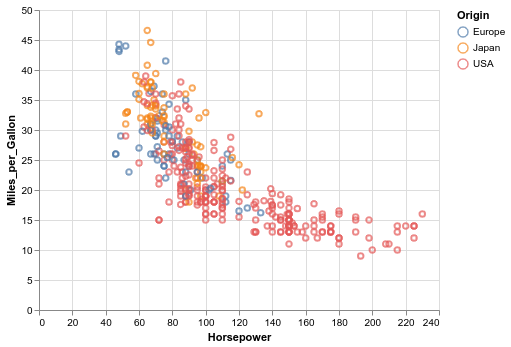

In [3]:
df = pd.read_json('cars.json')

%time alt.Chart(df).mark_point().encode(x='Horsepower', y='Miles_per_Gallon', color='Origin',)

In [4]:
import ipytablewidgets
chart = alt.Chart(df).mark_point().encode(
    x='Horsepower', 
    y='Miles_per_Gallon',
    color='Origin',
)

In [5]:
from vega.altair import stream
from vega.widget import VegaWidget

alt.data_transformers.enable('streaming')
from pprint import pprint
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.8.1.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data'},
 'encoding': {'color': {'field': 'Origin', 'type': 'nominal'},
              'x': {'field': 'Horsepower', 'type': 'quantitative'},
              'y': {'field': 'Miles_per_Gallon', 'type': 'quantitative'}},
 'mark': 'point'}


In [6]:
widget = VegaWidget(spec=chart.to_dict())
display(widget)
%time widget.update('data', insert=df)

VegaWidget()

CPU times: user 3.74 ms, sys: 0 ns, total: 3.74 ms
Wall time: 3.37 ms


In [7]:
stream(chart)

VegaWidget()

In [8]:

from vega_datasets import data

source = data.wheat()
threshold = pd.DataFrame([{"threshold": 90}])

bars = alt.Chart(source).mark_bar().encode(
    x="year:O",
    y="wheat:Q",
)

highlight = alt.Chart(source).mark_bar(color="#e45755").encode(
    x='year:O',
    y='baseline:Q',
    y2='wheat:Q'
).transform_filter(
    alt.datum.wheat > 90
).transform_calculate("baseline", "90")

rule = alt.Chart(threshold).mark_rule().encode(
    y='threshold:Q'
)

chart = (bars + highlight + rule).properties(width=600)


In [9]:
with alt.data_transformers.enable('streaming', context={}):
    pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.8.1.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data'},
 'layer': [{'encoding': {'x': {'field': 'year', 'type': 'ordinal'},
                         'y': {'field': 'wheat', 'type': 'quantitative'}},
            'mark': 'bar'},
           {'encoding': {'x': {'field': 'year', 'type': 'ordinal'},
                         'y': {'field': 'baseline', 'type': 'quantitative'},
                         'y2': {'field': 'wheat'}},
            'mark': {'color': '#e45755', 'type': 'bar'},
            'transform': [{'filter': '(datum.wheat > 90)'},
                          {'as': 'baseline', 'calculate': '90'}]},
           {'data': {'name': 'data-2'},
            'encoding': {'y': {'field': 'threshold', 'type': 'quantitative'}},
            'mark': 'rule'}],
 'width': 600}


In [10]:
# The streaming API overrides the default transformer
alt.data_transformers.enable('default')

DataTransformerRegistry.enable('default')

In [11]:
stream(chart, debug=True)

to_streaming 140015945224976
to_streaming 140015945228832


VegaWidget()

In [12]:
# Do not stream the threshold table, inlining it is fine

stream(chart, exceptions=[threshold], debug=True)

to_streaming 140015945224976
to_streaming 140015945228832
Exception for 140015945228832


VegaWidget()

In [13]:
from vega.altair import stream_examples

stream_examples()
#from altair_examples import iter_examples, exec_example

#errors = []
#for example in iter_examples():
#    chart = exec_example(example)
#    if chart is None:
#        print('Error for', example['name'])
#        errors.append(example['name'])
#    stream(chart)
#errors

wheat_wages
substituting url by dataframe for wheat


VegaWidget()

Time: 0.015637482 s
seattle_weather_interactive


VegaWidget()

Time: 0.020606237 s
selection_layer_bar_month


VegaWidget()

Time: 0.020635511 s
parallel_coordinates


VegaWidget()

Time: 0.011017063 s
top_k_with_others
substituting url by dataframe for movies


VegaWidget()

Time: 0.03808881 s
isotype


VegaWidget()

Time: 0.01249331 s
table_bubble_plot_github
substituting url by dataframe for github


VegaWidget()

Time: 0.009434281 s
area_chart_gradient


VegaWidget()

Time: 0.010542892 s
bar_chart_horizontal


VegaWidget()

Time: 0.006488144 s
histogram_responsive
substituting url by dataframe for flights-5k


VegaWidget()

Time: 0.053420796 s
poly_fit_regression


VegaWidget()

Time: 0.017492095 s
normalized_stacked_area_chart


VegaWidget()

Time: 0.007419278 s
select_detail


VegaWidget()

Time: 0.00849248 s
world_projections


VegaWidget()

Time: 0.010387746 s
top_k_items
substituting url by dataframe for movies


VegaWidget()

Time: 0.032507827 s
airports_count


VegaWidget()

Time: 0.009946076 s
interactive_cross_highlight


VegaWidget()

Time: 0.010824968 s
scatter_with_layered_histogram


VegaWidget()

Time: 0.011809484 s
interactive_layered_crossfilter


VegaWidget()

Time: 0.01065802 s
layered_histogram


VegaWidget()

Time: 0.006386459 s
multifeature_scatter_plot


VegaWidget()

Time: 0.008906373 s
choropleth


VegaWidget()

Time: 0.006295854 s
ridgeline_plot
substituting url by dataframe for seattle-weather


VegaWidget()

Time: 0.018506549 s
scatter_tooltips


VegaWidget()

Time: 0.011550212 s
stacked_bar_chart_sorted_segments


VegaWidget()

Time: 0.00846564 s
simple_scatter_with_errorbars


VegaWidget()

Time: 0.009860673 s
sorted_error_bars_with_ci


VegaWidget()

Time: 0.01066314 s
bar_chart_with_mean_line


VegaWidget()

Time: 0.006805728 s
horizontal_stacked_bar_chart


VegaWidget()

Time: 0.007391159 s
scatter_href


VegaWidget()

Time: 0.010536836 s
errorbars_with_std


VegaWidget()

Time: 0.008638105 s
line_chart_with_generator


VegaWidget()

Time: 0.006751056 s
filled_step_chart


VegaWidget()

Time: 0.011053124 s
boxplot
substituting url by dataframe for population


VegaWidget()

Time: 0.006298037 s
simple_histogram
substituting url by dataframe for movies


VegaWidget()

Time: 0.049999478 s
us_employment


VegaWidget()

Time: 0.020293208 s
co2_concentration
substituting url by dataframe for co2-concentration


VegaWidget()

Time: 0.026561494 s
gantt_chart


VegaWidget()

Time: 0.007151646 s
multiple_interactions


VegaWidget()

Time: 0.016397047 s
anscombe_plot


VegaWidget()

Time: 0.008579843 s
us_population_pyramid_over_time
substituting url by dataframe for population


VegaWidget()

Time: 0.012697983 s
isotype_grid


VegaWidget()

Time: 0.006968903 s
slope_graph


VegaWidget()

Time: 0.007626839 s
london_tube


VegaWidget()

Time: 0.008585731 s
top_k_letters


VegaWidget()

Time: 0.00895551 s
candlestick_chart


VegaWidget()

Time: 0.013282502 s
grouped_bar_chart_horizontal


VegaWidget()

Time: 0.007286836 s
normalized_stacked_bar_chart


VegaWidget()

Time: 0.007668288 s
simple_bar_chart


VegaWidget()

Time: 0.006853359 s
scatter_with_histogram


VegaWidget()

Time: 0.012029589 s
scatter_qq
substituting url by dataframe for normal-2d


VegaWidget()

Time: 0.007705479 s
one_dot_per_zipcode
substituting url by dataframe for zipcodes


VegaWidget()

Time: 0.112587918 s
scatter_with_rolling_mean


VegaWidget()

Time: 0.016010728 s
dot_dash_plot


VegaWidget()

Time: 0.014571871 s
bar_rounded


VegaWidget()

Time: 0.014184948 s
bar_and_line_with_dual_axis


VegaWidget()

Time: 0.007526713 s
bar_chart_with_highlighted_bar


VegaWidget()

Time: 0.008607465 s
scatter_marginal_hist


VegaWidget()

Time: 0.010383149 s
cumulative_count_chart
substituting url by dataframe for movies


VegaWidget()

Time: 0.034641901 s
us_incomebrackets_by_state_facet
substituting url by dataframe for income


VegaWidget()

Time: 0.012303479 s
bubble_plot


VegaWidget()

Time: 0.011353732 s
scatter_with_labels


VegaWidget()

Time: 0.008123589 s
grouped_bar_chart


VegaWidget()

Time: 0.009519724 s
multiline_tooltip


VegaWidget()

Time: 0.016141008 s
line_percent
substituting url by dataframe for jobs


VegaWidget()

Time: 0.01991479 s
window_rank


VegaWidget()

Time: 0.008982815 s
airports


VegaWidget()

Time: 0.03102907 s
strip_plot


VegaWidget()

Time: 0.014128303 s
simple_heatmap


VegaWidget()

Time: 0.010260274 s
bar_chart_sorted


VegaWidget()

Time: 0.010488448 s
cumulative_wiki_donations
Cannot substite url by dataset for https://frdata.wikimedia.org/donationdata-vs-day.csv trying direct load


VegaWidget()

Time: 0.010894714 s
density_stack


VegaWidget()

Time: 0.009390546 s
trellis_histogram


VegaWidget()

Time: 0.010202213 s
simple_line_chart


VegaWidget()

Time: 0.006267837 s
stacked_bar_chart


VegaWidget()

Time: 0.008007081 s
simple_stacked_area_chart


VegaWidget()

Time: 0.008620645 s
layer_line_color_rule


VegaWidget()

Time: 0.011863211 s
selection_histogram


VegaWidget()

Time: 0.015692264 s
us_state_capitals


VegaWidget()

Time: 0.01081292 s
trellis_area


VegaWidget()

Time: 0.007461844 s
step_chart


VegaWidget()

Time: 0.011592551 s
isotype_emoji


VegaWidget()

Time: 0.009315957 s
grouped_bar_chart_with_error_bars


VegaWidget()

Time: 0.010024286 s
scatter_linked_brush


VegaWidget()

Time: 0.011036031 s
scatter_with_minimap


VegaWidget()

Time: 0.014178823 s
layered_bar_chart


VegaWidget()

Time: 0.006594306 s
airport_connections


VegaWidget()

Time: 0.013551594 s
iowa_electricity


VegaWidget()

Time: 0.006456106 s
streamgraph
substituting url by dataframe for unemployment-across-industries


VegaWidget()

Time: 0.025238378 s
trellis_scatter_plot


VegaWidget()

Time: 0.018176448 s
diverging_stacked_bar_chart


VegaWidget()

Time: 0.008983783 s
errorbars_with_ci


VegaWidget()

Time: 0.007814707 s
beckers_barley_trellis_plot


VegaWidget()

Time: 0.009398 s
trellis_stacked_bar_chart


VegaWidget()

Time: 0.008632522 s
beckers_barley_wrapped_facet
substituting url by dataframe for barley


VegaWidget()

Time: 0.010067452 s
layered_chart_bar_mark


VegaWidget()

Time: 0.010291796 s
multi_series_line


VegaWidget()

Time: 0.009310802 s
choropleth_repeat


VegaWidget()

Time: 0.006035452 s
scatter_with_loess


VegaWidget()

Time: 0.009029197 s
interactive_brush


VegaWidget()

Time: 0.010219946 s
interactive_scatter_plot


VegaWidget()

Time: 0.010564674 s
histogram_with_a_global_mean_overlay
substituting url by dataframe for movies


VegaWidget()

Time: 0.027195957 s
world_map


VegaWidget()

Time: 0.007560519 s
trellis_area_sort_array


VegaWidget()

Time: 0.012537025 s
stripplot
substituting url by dataframe for movies


VegaWidget()

Time: 0.050137525 s
bar_chart_with_labels


VegaWidget()

Time: 0.010320555 s
scatter_matrix


VegaWidget()

Time: 0.01716232 s
weather_heatmap
substituting url by dataframe for seattle-temps


VegaWidget()

Time: 0.061745593 s
horizon_graph


VegaWidget()

Time: 0.012388868 s
gapminder_bubble_plot
substituting url by dataframe for gapminder-health-income


VegaWidget()

Time: 0.009326687 s
violin_plot


VegaWidget()

Time: 0.016665736 s
connected_scatterplot


VegaWidget()

Time: 0.009498664 s
stem_and_leaf


VegaWidget()

Time: 0.011333325 s
binned_scatterplot
substituting url by dataframe for movies


VegaWidget()

Time: 0.049103887 s
us_population_over_time_facet
substituting url by dataframe for population


VegaWidget()

Time: 0.009541305 s
select_mark_area
substituting url by dataframe for unemployment-across-industries


VegaWidget()

Time: 0.020194401 s
ranged_dot_plot
substituting url by dataframe for countries


VegaWidget()

Time: 0.013791109 s
interval_selection
substituting url by dataframe for sp500


VegaWidget()

Time: 0.007264863 s
falkensee


VegaWidget()

Time: 0.011590774 s
line_chart_with_points


VegaWidget()

Time: 0.00723061 s
interactive_legend
substituting url by dataframe for unemployment-across-industries


VegaWidget()

Time: 0.01932134 s
natural_disasters
substituting url by dataframe for disasters


VegaWidget()

Time: 0.008404951 s
wilkinson-dot-plot


VegaWidget()

Time: 0.008956628 s
multiline_highlight


VegaWidget()

Time: 0.014254352 s
line_with_ci


VegaWidget()

Time: 0.011440962 s
binned_heatmap
substituting url by dataframe for movies


VegaWidget()

Time: 0.035268369 s
bar_chart_with_highlighted_segment


VegaWidget()

Time: 0.010002746 s
density_facet


VegaWidget()

Time: 0.009259127 s
multiple_marks


VegaWidget()

Time: 0.012278845 s
layered_area_chart


VegaWidget()

Time: 0.007231774 s
layered_heatmap_text


VegaWidget()

Time: 0.022481097 s
percentage_of_total


VegaWidget()

Time: 0.010117503 s
layered_chart_with_dual_axis


VegaWidget()

Time: 0.021758362 s
scatter_linked_table


VegaWidget()

Time: 0.028208546 s
stacked_bar_chart_with_text


VegaWidget()

Time: 0.012222212 s
trail_marker


VegaWidget()

Time: 0.008127335 s
bar_chart_with_negatives


VegaWidget()

Time: 0.014117625 s
us_population_over_time
substituting url by dataframe for population


VegaWidget()

Time: 0.008300078 s
normed_parallel_coordinates


VegaWidget()

Time: 0.013519259 s


{}